[View in Colaboratory](https://colab.research.google.com/github/sbh69840/FLANN_lsh-mnist/blob/master/Signature_demo.ipynb)


# Signature Recognition and Verification (Off-line)

This is a demo of the paper "**Signature Recognition using invariant moments and Approximate Nearest Neighbors with LSH for signature verification to use this approach on the basis of a cloud computing architecture**" *- by Shivaraj B.H. *(Me)

> Since a sign plays a very important role in one's life, I have decided to create a demo of the above paper so that everyone reading this will easily be able to understand the way I have approached the problem in the paper. I have only used standard python libraries to implement the above algorithm and hope this gives a good result.

The dataset being used here is the[ UTSig dataset](https://www.semanticscholar.org/paper/UTSig%3A-A-Persian-Offline-Signature-Dataset-Soleimani-Fouladi/4b133ba6de9a7e1c7305c65eae34cde6ed34f8ce) which is publicly available.
So without any further due let's get started.![The image is copyright free and licensed under CC0 license](https://images.pexels.com/photos/48148/document-agreement-documents-sign-48148.jpeg?auto=compress&cs=tinysrgb&h=350&w=940)


In [0]:
#Install the required packages
!pip install pyflann

In [0]:
#import all the files here
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np
import cv2

# Three sample images 
These images are shown to show the preprocessing process because I can't upload the entire dataset which is around 250mb here (Takes a lot of time). Therefore, I am running the preprocess step locally and only displaying the steps on three images.

fatal: destination path 'UTSig' already exists and is not an empty directory.
('The shapes of the images in the order are : ', (1017, 860), (811, 1049), (463, 689))


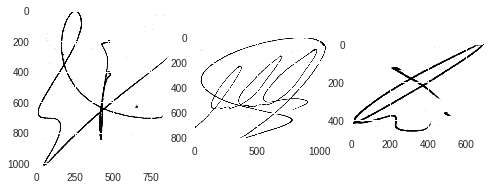

In [24]:
!git clone https://github.com/sbh69840/UTSig.git
#View the images
img = np.asarray(Image.open("UTSig/1.tif"))
img1 = np.asarray(Image.open("UTSig/2.tif"))
img2 = np.asarray(Image.open("UTSig/3.tif"))
plt.subplot(131)
plt.imshow(img,cmap = plt.get_cmap('gray'))
plt.subplot(132)
plt.imshow(img1,cmap = plt.get_cmap('gray'))
plt.subplot(133)
plt.imshow(img2,cmap = plt.get_cmap('gray'))
print("The shapes of the images in the order are : ",img.shape,img1.shape,img2.shape)


# Preprocessing Steps

The Steps that I thought I will be using for preprocessing are as follows :
1. RGB to gray 
2. Thresholding, so that the signature part is given more prominence than the background.
3. Reducing Noise in the image
4. Cropping and resizing the image to a desired size required for training.


Out of which 1,2,3 is done by the creators of the dataset so all that I have to worry is  resizing, but still I will try with thresholding once to check if it boosts the performance.
And since this domain involves finding the originality of signature I wouldn't want to manipulate the data too much and make the problem more confusing.

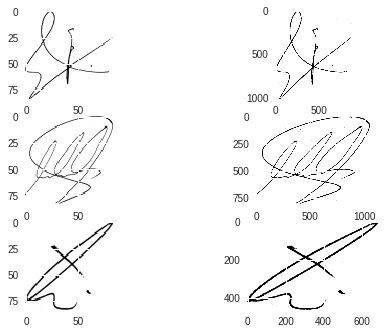

In [26]:
#cv2 is used to resize the image with INTER_AREA interpolation.
img_new = cv2.resize(img,(84,84),interpolation=cv2.INTER_AREA)
img1_new = cv2.resize(img1,(84,84),interpolation=cv2.INTER_AREA)
img2_new = cv2.resize(img2,(84,84),interpolation=cv2.INTER_AREA)
plt.subplot(321)
plt.imshow(img_new,cmap=plt.get_cmap('gray'))
plt.subplot(322)
plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.subplot(323)
plt.imshow(img1_new,cmap=plt.get_cmap('gray'))
plt.subplot(324)
plt.imshow(img1,cmap=plt.get_cmap('gray'))
plt.subplot(325)
plt.imshow(img2_new,cmap=plt.get_cmap('gray'))
plt.subplot(326)
plt.imshow(img2,cmap=plt.get_cmap('gray'))


# Thresholding Image
Just to see if the signature can be viewed more precisely.
As we can see the results below, there is no much difference when I view the original image and their threshold images respectively.

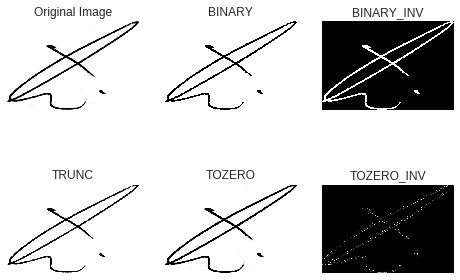

In [34]:

#The code credits goes to opencv website --> 
#https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
ret,thresh1 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img2,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img2,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img2,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img2, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

**But the view changes when I view the same threshold images of resized image and it seems that Torenzo gives a more clear picture of the image.**

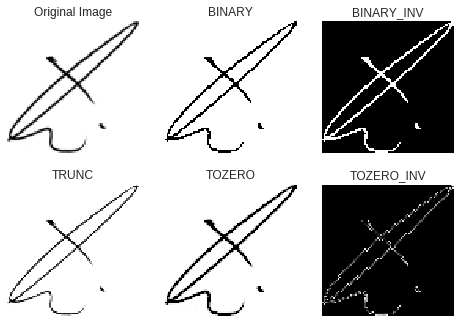

In [33]:

#The code credits goes to opencv website --> 
#https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
ret,thresh1 = cv2.threshold(img2_new,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img2_new,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img2_new,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img2_new,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img2_new,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img2_new, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()